In [43]:
import numpy as np

file = open("score_matrix.txt")
n = int(file.readline().strip())

SUBST_MATRIX = []
LETTERS = {}
NUMBERS = []

for i in range(n):
    line = file.readline().strip()
    letter, rest = line.split(" ", maxsplit=1)
    row = [int(x) for x in rest.split(" ") if x != ""]
    SUBST_MATRIX.append(row)
    LETTERS[letter.upper()] = i
    NUMBERS.append(letter.upper())

GAP_CONT_COST = int(file.readline().strip())
GAP_START_COST = int(file.readline().strip())

file.close()

class AlignerLinear:
    def __init__(self, A, B):
        self.A = []
        self.B = []

        for c in A:
            self.A.append(LETTERS[c])

        for c in B:
            self.B.append(LETTERS[c])

        self.T = []
        self.AA = []
        self.BB = []

        for i in range(0, len(A) + 1):
            r = []

            for j in range(0, len(B) + 1):
                r.append(None)

            self.T.append(r)

        self.T[0][0] = 0

    def align(self):
        # Avoid  recursion errors
        for i in range(len(self.A) + 1):
            for j in range(len(self.B) + 1):
                self.C(i, j)
        
        self.C(len(self.A), len(self.B))

    def cost(self):
        self.align()
        return self.T[len(self.A)][len(self.B)]

    def optimal_alignment(self):
        self.RecurBackTrack(len(self.A), len(self.B))
        self.aligned_A = self.AA
        self.aligned_A.reverse()
        self.aligned_B = self.BB
        self.aligned_B.reverse()
        return "".join(self.aligned_A),\
               "".join(self.aligned_B)

    def C(self, i, j):
        if self.T[i][j] == None:
            v = []

            if i > 0 and j > 0:
                v.append(self.C(i - 1, j - 1) + SUBST_MATRIX[self.A[i - 1]][self.B[j - 1]])
            if i > 0 and j >= 0:
                v.append(self.C(i - 1, j) - GAP_CONT_COST)
            if i >= 0 and j > 0:
                v.append(self.C(i, j - 1) - GAP_CONT_COST)
            if i == 0 and j == 0:
                v.append(0)

            self.T[i][j] = min(v)

        return self.T[i][j]

    def RecurBackTrack(self, i, j):
        if (i > 0) and (j > 0) and self.T[i][j] == \
                self.T[i - 1][j - 1] + SUBST_MATRIX[self.A[i - 1]][self.B[j - 1]]:
            self.AA.append(NUMBERS[self.A[i - 1]])
            self.BB.append(NUMBERS[self.B[j - 1]])
            self.RecurBackTrack(i - 1, j - 1)
        elif (i > 0) and (j >= 0) and self.T[i][j] == self.T[i - 1][j] - GAP_CONT_COST:
            self.AA.append(NUMBERS[self.A[i - 1]])
            self.BB.append("-")
            self.RecurBackTrack(i - 1, j)
        elif (i >= 0) and (j > 0) and self.T[i][j] == self.T[i][j - 1] - GAP_CONT_COST:
            self.AA.append("-")
            self.BB.append(NUMBERS[self.B[j - 1]])
            self.RecurBackTrack(i, j - 1)

class AlignerAffine:
    def __init__(self, A, B):
        self.A = []
        self.B = []

        for c in A:
            self.A.append(LETTERS[c])

        for c in B:
            self.B.append(LETTERS[c])

        self.S = []
        self.D = []
        self.I = []
        self.AA = []
        self.BB = []

        for i in range(0, len(A) + 1):
            r = []

            for j in range(0, len(B) + 1):
                r.append(None)

            self.S.append(r)

            r = []

            for j in range(0, len(B) + 1):
                r.append(None)

            self.D.append(r)

            r = []

            for j in range(0, len(B) + 1):
                r.append(None)

            self.I.append(r)

        self.S[0][0] = 0

    def align(self):
        # Avoid  recursion errors
        for i in range(len(self.A) + 1):
            for j in range(len(self.B) + 1):
                self.CS(i, j)

        self.CS(len(self.A), len(self.B))

    def cost(self):
        self.align()
        return self.S[len(self.A)][len(self.B)]

    def optimal_alignment(self):
        self.BackTrack()
        self.aligned_A = self.AA
        self.aligned_A.reverse()
        self.aligned_B = self.BB
        self.aligned_B.reverse()
        return "".join(self.aligned_A),\
               "".join(self.aligned_B)

    def CS(self, i, j):
        if self.S[i][j] == None:
            v = []

            if i > 0 and j > 0:
                v.append(self.CS(i - 1, j - 1) + SUBST_MATRIX[self.A[i - 1]][self.B[j - 1]])
            if i > 0 and j >= 0:
                v.append(self.CD(i, j))
            if i >= 0 and j > 0:
                v.append(self.CI(i, j))
            if i == 0 and j == 0:
                v.append(0)

            self.S[i][j] = min(v)

        return self.S[i][j]


    def CD(self, i, j):
        if self.D[i][j] == None:
            v = []

            if i > 0 and j >= 0:
                v.append(self.CS(i - 1, j) - (GAP_START_COST + GAP_CONT_COST))
            if i > 1 and j >= 0:
                v.append(self.CD(i - 1, j) - GAP_CONT_COST)

            self.D[i][j] = min(v)

        return self.D[i][j]


    def CI(self, i, j):
        if self.I[i][j] == None:
            v = []

            if i >= 0 and j > 0:
                v.append(self.CS(i, j - 1) - (GAP_START_COST + GAP_CONT_COST))
            if i >= 0 and j > 1:
                v.append(self.CI(i, j - 1) - GAP_CONT_COST)

            self.I[i][j] = min(v)

        return self.I[i][j]


    def BackTrack(self):
        i = len(self.A)
        j = len(self.B)

        while (i != 0 and j != 0):
            if (i > 0) and (j > 0) and self.S[i][j] == \
                    self.S[i - 1][j - 1] + SUBST_MATRIX[self.A[i - 1]][self.B[j - 1]]:
                self.AA.append(NUMBERS[self.A[i - 1]])
                self.BB.append(NUMBERS[self.B[j - 1]])
                i -= 1
                j -= 1

            for k in range(1, j+i):
                if (i >= k and self.S[i][j] == (self.S[i-k][j] - (GAP_CONT_COST*k + GAP_START_COST))):
                    for l in range(1,k+1):
                        self.BB.append("-")
                        self.AA.append(NUMBERS[self.A[i -l]])
                    i -= k
                    break
                if (j >= k and self.S[i][j] == (self.S[i][j-k] - (GAP_CONT_COST*k + GAP_START_COST))):
                    for l in range(1,k+1):
                        self.AA.append("-")
                        self.BB.append(NUMBERS[self.B[j -l]])
                    j -= k
                    break

In [11]:
import random
def random_seq(length):
    return random.choices(["A", "C", "G", "T"], k=length)

In [49]:
import time

def align_time(length):
    s1 = random_seq(length)
    s2 = random_seq(length)

    t = time.time()
    AlignerLinear(s1,s2).align()
    return time.time() - t

def align_time_a(length):
    s1 = random_seq(length)
    s2 = random_seq(length)

    t = time.time()
    AlignerAffine(s1,s2).align()
    return time.time() - t

In [50]:
lengths = [100, 200, 500, 1000, 1200, 1500, 2000]
times = []

for length in lengths:
    times.append(align_time(length))

In [51]:
import matplotlib.pyplot as plt

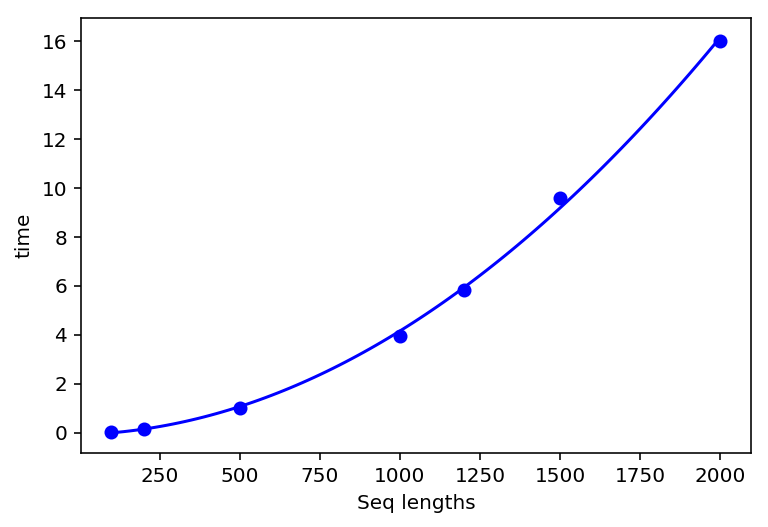

In [52]:
x = lengths
y = times

reg = np.polyfit(x, y, 2)
f = np.poly1d(reg)

xf = np.linspace(x[0], x[-1], 100)
yf = f(xf)

plt.scatter(x, y, c='b')
plt.plot(xf, yf, c='b')

plt.xlabel("Seq lengths")
plt.ylabel("time")
plt.show()

In [53]:
lengths = [100, 200, 500, 1000, 1200, 1500]
times = []

for length in lengths:
    print(length)
    times.append(align_time_a(length))

100
200


500


1000


1200


1500


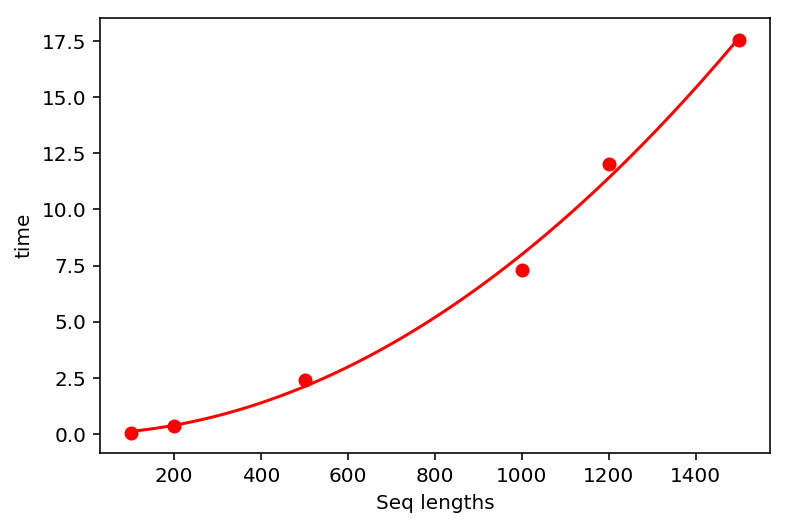

In [54]:
xx = lengths
yy = times

reg = np.polyfit(xx, yy, 2)
f = np.poly1d(reg)

xxf = np.linspace(xx[0], xx[-1], 100)
yyf = f(xxf)

plt.scatter(xx, yy, c='r')
plt.plot(xxf, yyf, c='r')

plt.xlabel("Seq lengths")
plt.ylabel("time")
plt.show()

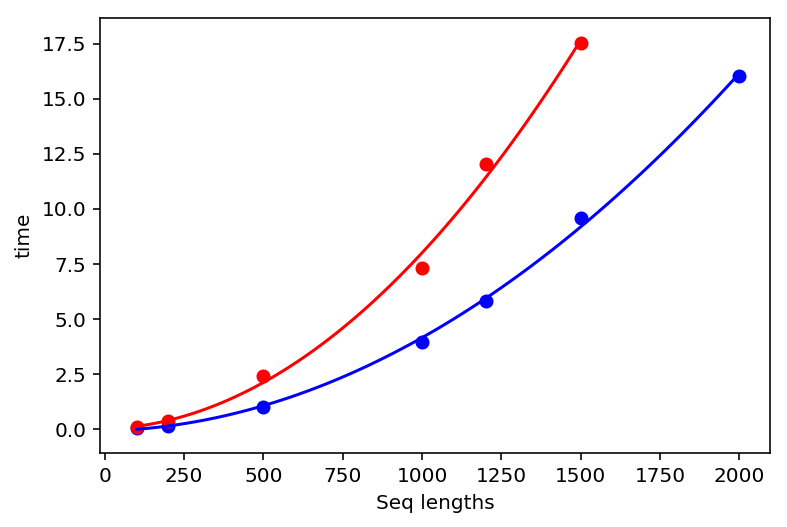

In [55]:
plt.scatter(x, y, c='b')
plt.scatter(xx, yy, c='r')
plt.plot(xf, yf, c='b')
plt.plot(xxf, yyf, c='r')

plt.xlabel("Seq lengths")
plt.ylabel("time")
plt.show()